# Semiconductor Manufacturing Process Feature Selection

Data from Kaggle.com https://www.kaggle.com/datasets/paresh2047/uci-semcom/code

### Description 

This is a high dimentionality data set of various sensor data during the semiconductor manufacturing process. 

### Goals

- To reduce feature dimensionality while maintaining model performance
- Maintain model performance by transforming at high dimensional datase of 592 features into a more manageable set 

In [10]:
# Import Dependencies and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Get Data from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paresh2047/uci-semcom")

print("Path to dataset files:", path)   

Path to dataset files: /Users/matt/.cache/kagglehub/datasets/paresh2047/uci-semcom/versions/1


In [12]:
# Read Data into DataFrame
df = pd.read_csv(f"{path}/uci-secom.csv")

In [13]:
# preview first 10 rows
df.head(10)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


### Data Exploration

In [8]:
# get shape of df
df.shape

(1567, 592)

In [9]:
# Get all unique values in target column
df['Pass/Fail'].unique()

array([-1,  1])

In [14]:
# Get info of df
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), str(1)
memory usage: 7.1 MB


In [16]:
# Find sum of null values
df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [17]:
# Fill null values with 0
df.fillna(0, inplace=True)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [18]:
# Confirm no null values remain
df.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [26]:
# Import additional libraries for feature selection and modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
# Prepare data for modeling
# Separate features and target
# Drop 'Time' column as it's not a feature
X = df.drop(['Time', 'Pass/Fail'], axis=1)
y = df['Pass/Fail']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1253, 590)
Test set shape: (314, 590)


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=10: Accuracy = 0.9204


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=20: Accuracy = 0.9204


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=30: Accuracy = 0.9172


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=40: Accuracy = 0.9204


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=50: Accuracy = 0.9172


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=60: Accuracy = 0.9172


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=70: Accuracy = 0.9204


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=80: Accuracy = 0.9172


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=90: Accuracy = 0.9172


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 13  52  97 141 149 178 179 186 189 190 191 192 193 194 226 229 230 231
 232 233 234 235 236 237 240 241 242 243 256 257 258 259 260 261 262 263
 264 265 266 276 284 313 314 315 322 325 326 327 328 329 330 364 369 370
 371 372 373 374 375 378 379 380 381 394 395 396 397 398 399 400 401 402
 403 404 414 422 449 450 451 458 461 462 463 464 465 466 481 498 501 502
 503 504 505 506 507 508 509 512 513 514 515 528 529 530 531 532 533 534
 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


k=100: Accuracy = 0.9204


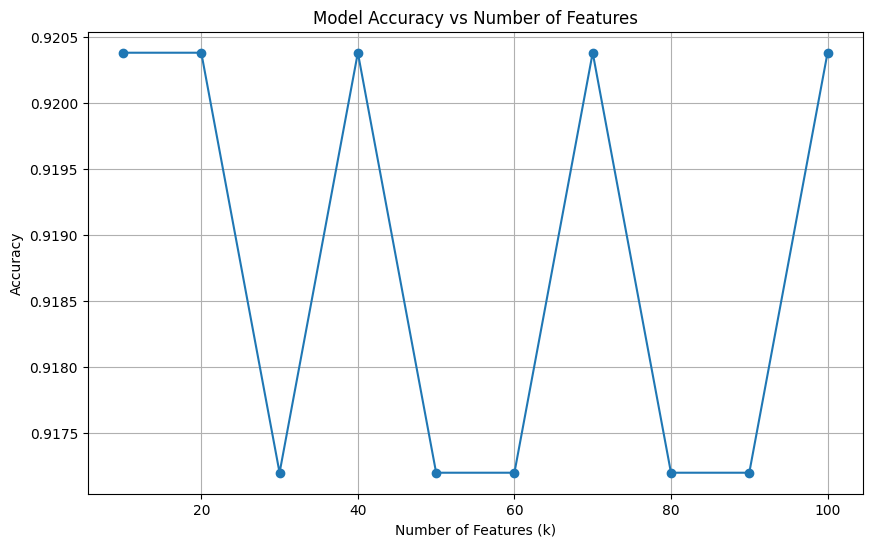

Optimal number of features: 10 with accuracy: 0.9204


In [28]:
# Optimize number of features using SelectKBest and RandomForest
k_values = range(10, 101, 10)  # Test from 10 to 100 features in steps of 10
accuracies = []

for k in k_values:
    # Select top k features
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    # Train RandomForest
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}: Accuracy = {acc:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Model Accuracy vs Number of Features')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find optimal k
optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal number of features: {optimal_k} with accuracy: {max(accuracies):.4f}")